After we setup model velocity, acquition geometery and source wavelet. Then, we want to generate data

In [2]:
using JUDI, JLD, PyPlot, SegyIO

## 00_Loading Model, Acquitition Parameters and Source Wavelets data

In [3]:
model = load("../data/velocity/model_p_wave_marm.jld", "data")
rec_geometry = load("../data/geometry/0_rec_geometry_marm.jld", "data")
src_geometry = load("../data/geometry/1_src_geometry_marm.jld", "data")
wavelet = load("../data/geometry/2_wavelet_marm.jld", "data");

## 01_Setup JUDI Operator

Read the documentation to generate Linear Operator modelling https://slimgroup.github.io/JUDI.jl/dev/linear_operators/

In [4]:
F = judiModeling(model, src_geometry, rec_geometry)
q = judiVector(src_geometry, wavelet)
d_obs = F*q

Building forward operator
Operator `forward` ran in 0.30 s
Operator `forward` ran in 0.32 s
Operator `forward` ran in 0.34 s
Operator `forward` ran in 0.35 s
Operator `forward` ran in 0.36 s
Operator `forward` ran in 3.93 s
Operator `forward` ran in 0.36 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.37 s
Operator `forward` ran in 0.36 s
Operator `forward` ran in 0.37 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.37 s
Operator `forward` ran in 0.37 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.43 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.41 s
Operator `forward` ran in 0.38 s
Operator `forward` ran in 0.41 s
Operator `forward` ran in 0.40 s
Operator `forward` ran in 0.39 s
Operator `forward` ran in 0.40 s
Operator `forward` ran in 0.37 s
Operator `forward` ran in 0.37 s
Operator `forward

judiVector{Float32, Matrix{Float32}} with 181 sources


## 02 Ploting Data Observation

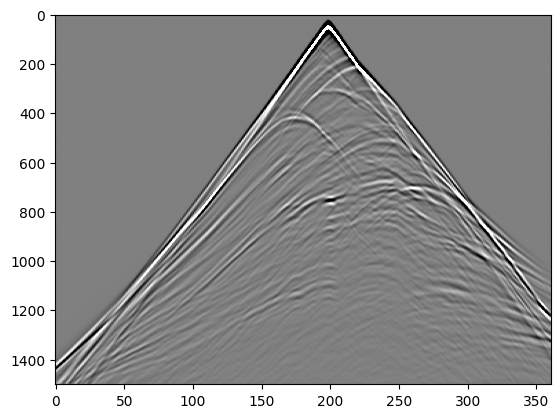

PyObject <matplotlib.image.AxesImage object at 0x7f938d623550>

In [5]:
imshow(d_obs.data[100], aspect="auto", cmap="gray", vmin=-0.5, vmax=0.5)

## 03 Save Data Obs to Segy

In [6]:
block_out = judiVector_to_SeisBlock(d_obs, q; source_depth_key="SourceDepth")
segy_write("../data/sgy/marmousi_2D.segy", block_out)